In [1]:
import tensorflow as tf
import keras

In [6]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras import Model
from keras.layers import Dense,Input,Dropout
from keras.callbacks import ModelCheckpoint,TensorBoard
from keras import regularizers
%matplotlib inline
sns.set(style='whitegrid',palette='muted',font_scale=1.5)
rcParams['figure.figsize']=10,6
RANDOM_SEED=42
LABELS=['Normal','Fraud']

In [7]:
df=pd.read_csv('D:\phani\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df.shape

(284807, 31)

In [9]:

df.isnull().values.any()

False

In [10]:

df.isna().sum().sum()


0

C:\Users\phani\AppData\Local\Temp\ipykernel_15044\3266969269.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes=pd.value_counts(df['Class'],sort=True)


Text(0, 0.5, 'Frequency')

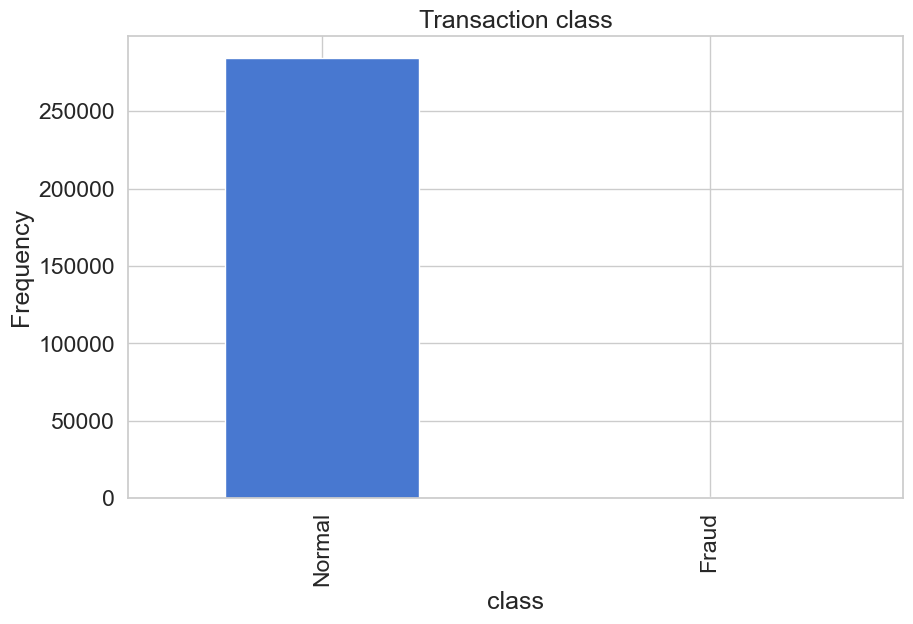

In [11]:
count_classes=pd.value_counts(df['Class'],sort=True)
count_classes.plot(kind='bar')
plt.title('Transaction class')
plt.xticks(range(2),LABELS)
plt.xlabel('class')
plt.ylabel('Frequency')

<Axes: ylabel='count'>

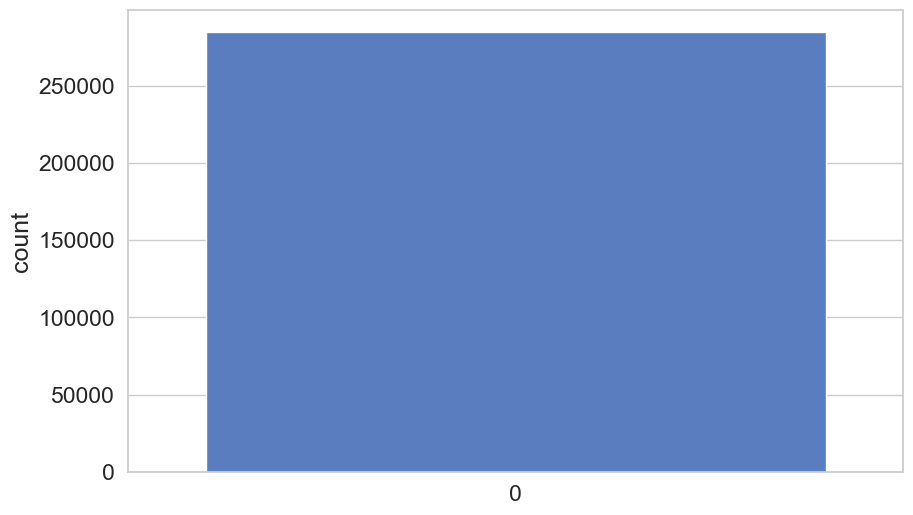

In [12]:
sns.countplot(df['Class'])


In [13]:
frauds=df[df.Class==1]
normal=df[df.Class==0]

In [14]:
frauds.shape

(492, 31)

In [15]:
normal.shape


(284315, 31)

In [16]:
frauds.Amount.describe()


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [17]:
normal.Amount.describe()


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

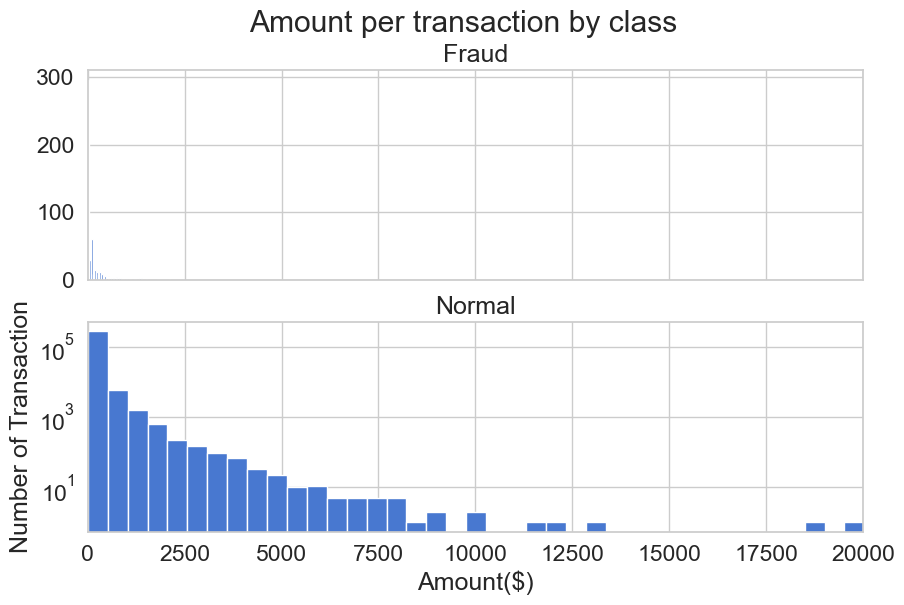

In [18]:
f,(ax1,ax2)=plt.subplots(2,1,sharex=True)
f.suptitle('Amount per transaction by class')
bins=50
ax1.hist(frauds.Amount,bins=bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount,bins=bins)
ax2.set_title('Normal')
plt.xlabel('Amount($)')
plt.ylabel('Number of Transaction')
plt.xlim((0,20000))
plt.yscale('log')
plt.show()


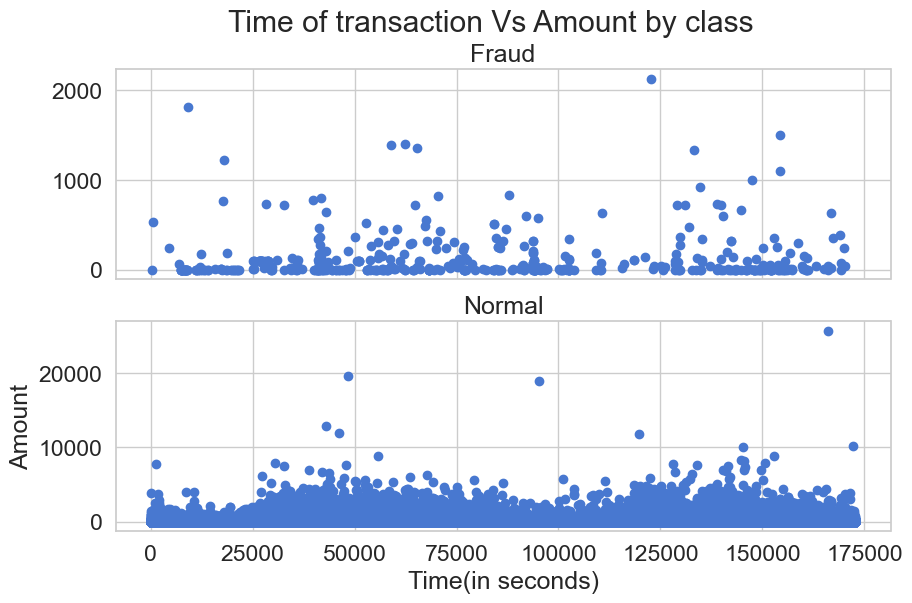

In [19]:
f,(ax1,ax2)=plt.subplots(2,1,sharex=True)
f.suptitle('Time of transaction Vs Amount by class')
ax1.scatter(frauds.Time,frauds.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time,normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time(in seconds)')
plt.ylabel('Amount')
plt.show()


In [20]:
from sklearn.preprocessing import StandardScaler
data=df.drop(['Time'],axis=1)
data['Amount']=StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))


In [21]:
data['Amount'][0]


0.24496426337017338

In [22]:
xtrain,xtest=train_test_split(data,test_size=0.2,random_state=RANDOM_SEED)
xtrain=xtrain[xtrain.Class==0]
xtrain=xtrain.drop(['Class'],axis=1)
print(xtrain.shape)
print()
print(xtrain.head(2))


(227451, 29)

              V1        V2        V3        V4        V5        V6        V7  \
223361  1.955041 -0.380783 -0.315013  0.330155 -0.509374 -0.086197 -0.627978   
165061 -0.400975 -0.626943  1.555339 -2.017772 -0.107769  0.168310  0.017959   

              V8        V9       V10  ...       V20       V21       V22  \
223361  0.035994  1.054560 -0.030441  ... -0.125390  0.238197  0.968305   
165061 -0.401619  0.040378  0.611115  ... -0.470372 -0.153485  0.421703   

             V23       V24       V25       V26       V27       V28    Amount  
223361  0.053208 -0.278602 -0.044999 -0.216780  0.045168 -0.047145 -0.313289  
165061  0.113442 -1.004095 -1.176695  0.361924 -0.370469 -0.144792 -0.169717  

[2 rows x 29 columns]


In [23]:
ytest=xtest['Class']
#xtest.head()
xtest=xtest.drop(['Class'],axis=1)
xtrain=xtrain.values
xtest=xtest.values


In [24]:
print(xtrain.shape)
print()
print(xtest.shape)


(227451, 29)

(56962, 29)


In [25]:

input_dim=xtrain.shape[1]
encoding_dim=14


In [26]:
input_layer=Input(shape=(input_dim,))
encoder=Dense(encoding_dim,activation='tanh',
             activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder=Dense(int(encoding_dim/2),activation='relu')(encoder)
decoder=Dense(int(encoding_dim/2),activation='tanh')(encoder)
decoder=Dense(input_dim,activation='relu')(decoder)
autoencoder=Model(inputs=input_layer,outputs=decoder)

In [27]:

autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 29)]              0         
                                                                 
 dense (Dense)               (None, 14)                420       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 29)                232       
                                                                 
Total params: 813 (3.18 KB)
Trainable params: 813 (3.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
nb_epoch=30
batch_size=32
autoencoder.compile(optimizer='adam',
                   loss='mean_squared_error',
                   metrics=['accuracy'])
checkpointer=ModelCheckpoint(filepath='model_ae.h5',
                            verbose=0,
                            save_best_only=True)
tensorboard=TensorBoard(log_dir='./logs',
                       histogram_freq=0,
                       write_graph=True,
                       write_images=True)
history=autoencoder.fit(xtrain,xtrain,
                       epochs=nb_epoch,
                       batch_size=batch_size,
                       shuffle=True,
                       validation_data=(xtest,xtest),
                       verbose=1,
                       callbacks=[checkpointer,tensorboard]).history


Epoch 1/30
7108/7108 [==============================] - 14s 2ms/step - loss: 0.8099 - accuracy: 0.5861 - val_loss: 0.7855 - val_accuracy: 0.6458
Epoch 2/30
  64/7108 [..............................] - ETA: 11s - loss: 0.6996 - accuracy: 0.6553

E:\anaconda\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7108/7108 [==============================] - 12s 2ms/step - loss: 0.7428 - accuracy: 0.6455 - val_loss: 0.7686 - val_accuracy: 0.6512
Epoch 3/30
7108/7108 [==============================] - 12s 2ms/step - loss: 0.7286 - accuracy: 0.6610 - val_loss: 0.7552 - val_accuracy: 0.6894
Epoch 4/30
7108/7108 [==============================] - 12s 2ms/step - loss: 0.7192 - accuracy: 0.6925 - val_loss: 0.7497 - val_accuracy: 0.7023
Epoch 5/30
7108/7108 [==============================] - 12s 2ms/step - loss: 0.7154 - accuracy: 0.6991 - val_loss: 0.7459 - val_accuracy: 0.6964
Epoch 6/30
7108/7108 [==============================] - 12s 2ms/step - loss: 0.7129 - accuracy: 0.7013 - val_loss: 0.7441 - val_accuracy: 0.7043
Epoch 7/30
7108/7108 [==============================] - 12s 2ms/step - loss: 0.7108 - accuracy: 0.7049 - val_loss: 0.7436 - val_accuracy: 0.7004
Epoch 8/30
7108/7108 [==============================] - 13s 2ms/step - loss: 0.7095 - accuracy: 0.7077 - val_loss: 0.7424 - val_accuracy: 0.7

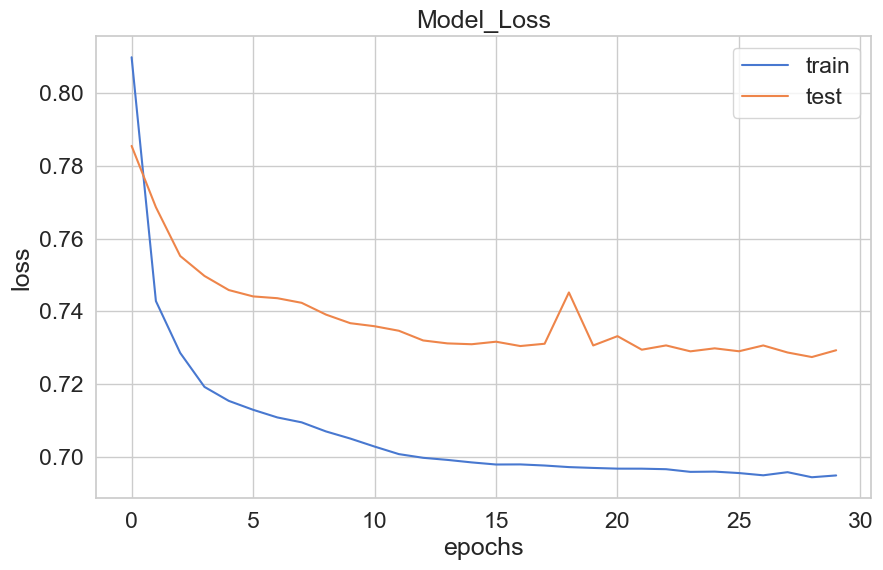

In [29]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model_Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper right')


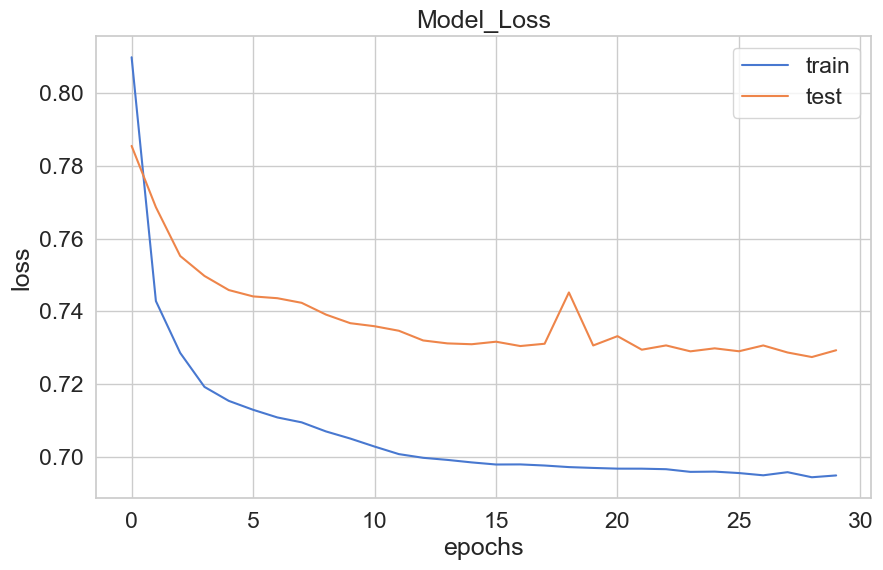

In [30]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model_Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper right')


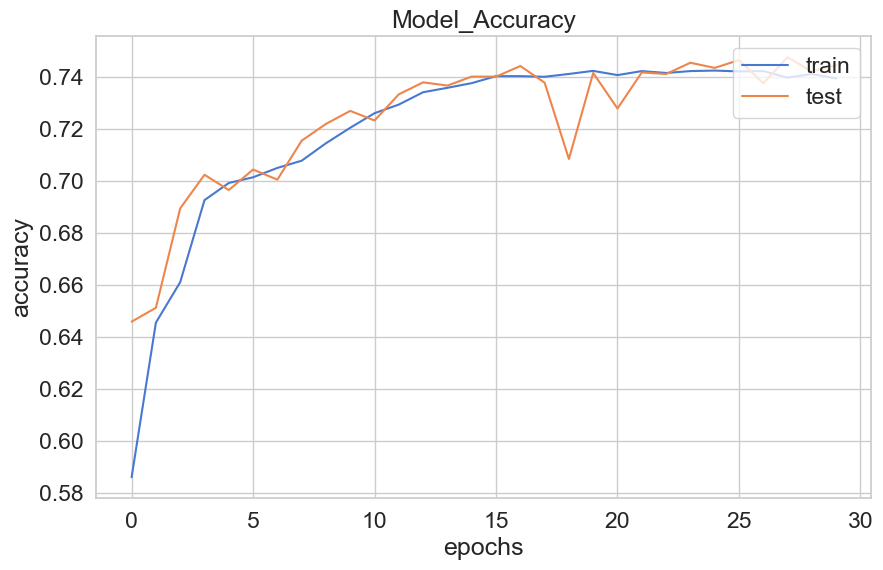

In [31]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model_Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper right')


In [32]:
predictions=autoencoder.predict(xtest)


1781/1781 [==============================] - 2s 1ms/step


In [33]:
mse=np.mean(np.power(xtest-predictions,2),axis=1)
error_df=pd.DataFrame({'Reconstruction_error':mse,'true_class':ytest})


In [34]:

error_df

,Reconstruction_error,true_class
43428,82.086711,1
49906,0.799069,0
29474,0.228385,0
276481,0.378705,0
278846,0.158050,0
...,...,...
75723,0.712047,0
252263,0.225242,0
221246,0.508924,0
81910,0.152019,0


In [35]:
error_df.describe()


,Reconstruction_error,true_class
count,56962.000000,56962.000000
mean,0.728469,0.001720
std,3.418511,0.041443
min,0.051631,0.000000
25%,0.234518,0.000000
50%,0.373540,0.000000
75%,0.594851,0.000000
max,258.015154,1.000000


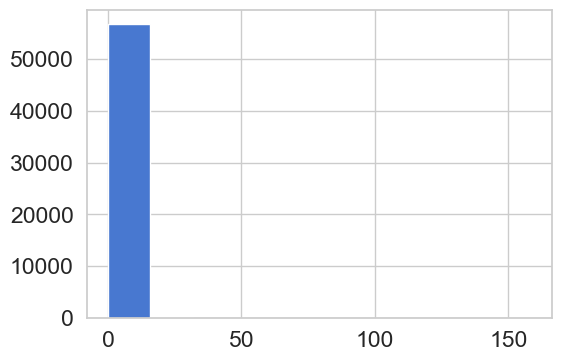

In [41]:
fig=plt.figure(figsize=(6,4))
ax=fig.add_subplot(111)
normal_error_df=error_df[(error_df['true_class']==0) & (error_df['Reconstruction_error'])]
_=ax.hist(normal_error_df.Reconstruction_error.values,bins=10)

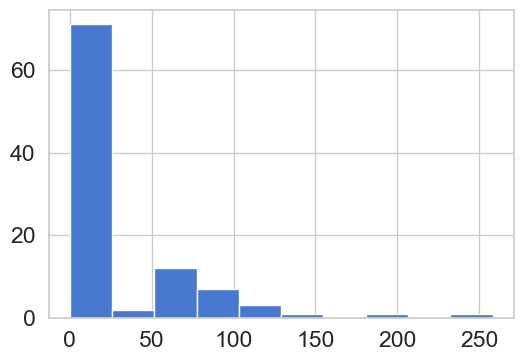

In [42]:
fig=plt.figure(figsize=(6,4))
ax=fig.add_subplot(111)
fraud_error_df=error_df[(error_df['true_class']==1)]
_=ax.hist(fraud_error_df.Reconstruction_error.values,bins=10)


In [43]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import precision_recall_curve,auc,roc_curve,recall_score,f1_score
from sklearn.metrics import precision_recall_fscore_support


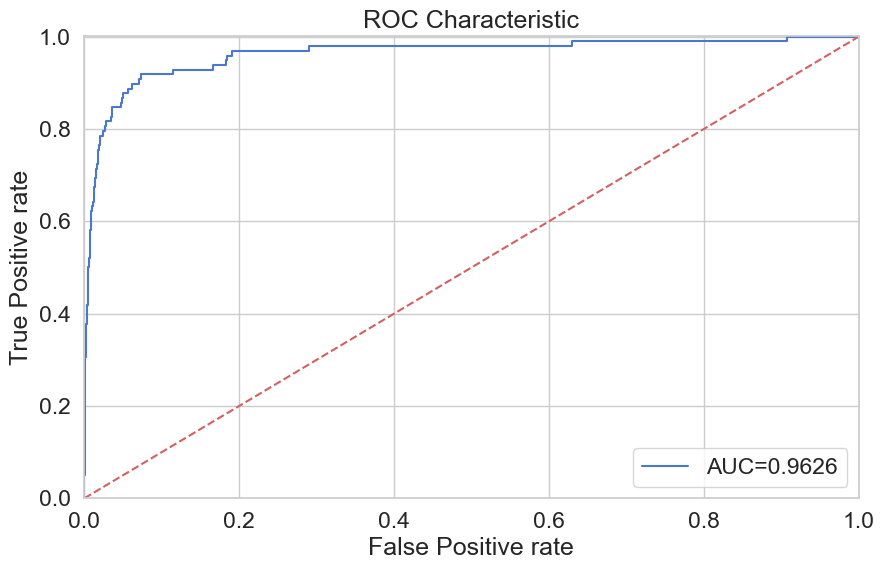

In [44]:
fpr,tpr,thresholds=roc_curve(error_df.true_class,error_df.Reconstruction_error)
roc_auc=auc(fpr,tpr)
plt.title('ROC Characteristic')
plt.plot(fpr,tpr,label='AUC=%0.4f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001,1])
plt.ylim([0,1.001])
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.show()

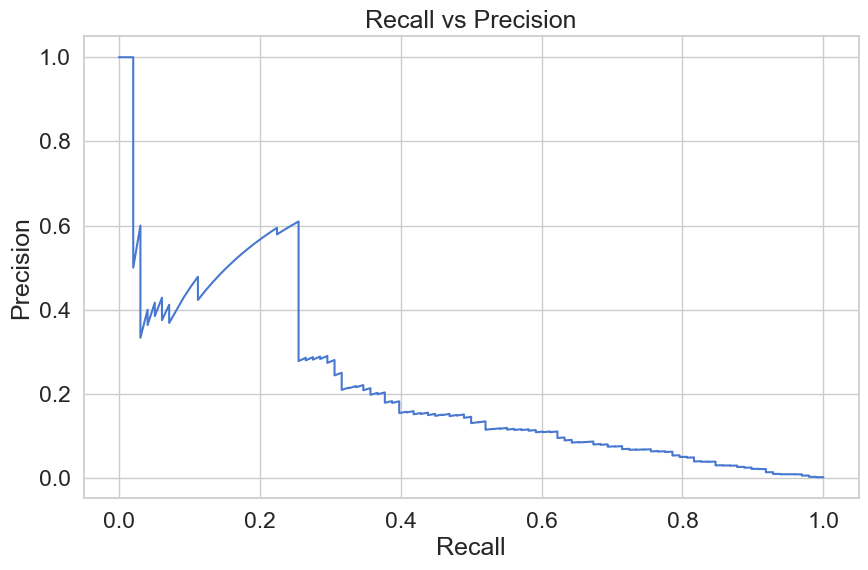

In [47]:
precision,recall,th=precision_recall_curve(error_df.true_class,error_df.Reconstruction_error)
plt.plot(recall,precision,'b',label='precision-recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


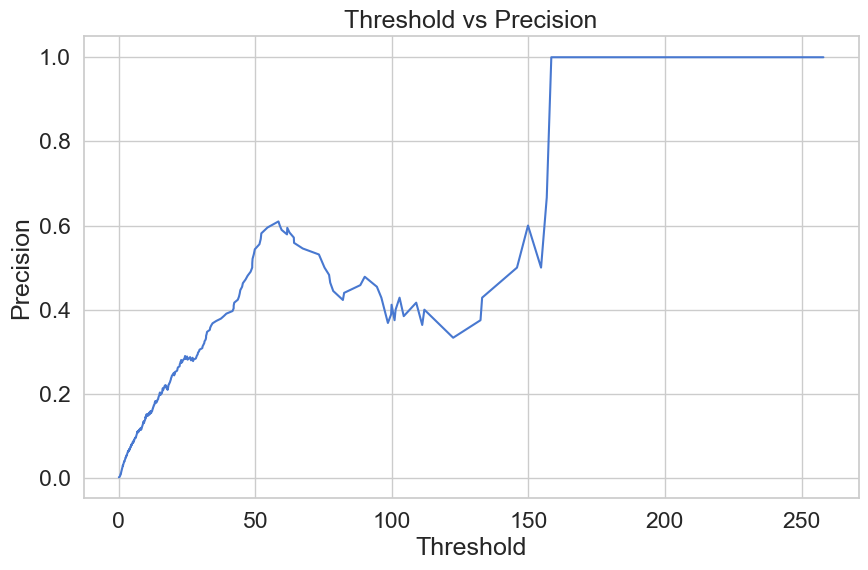

In [48]:
precision,recall,th=precision_recall_curve(error_df.true_class,error_df.Reconstruction_error)
plt.plot(th,precision[1:],'b',label='Threshold-precision curve')
plt.title('Threshold vs Precision')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()


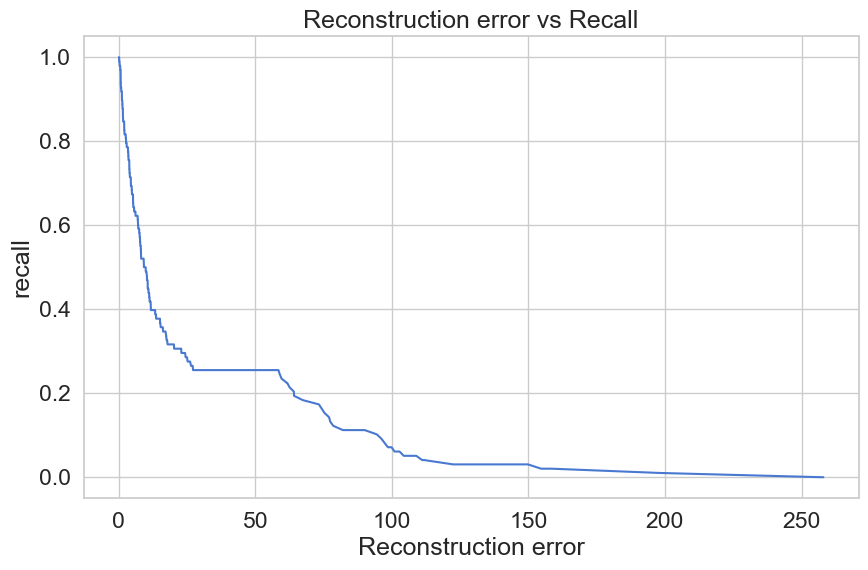

In [49]:
plt.plot(th,recall[1:],'b',label='Threshold-recall curve')
plt.title('Reconstruction error vs Recall')
plt.xlabel('Reconstruction error')
plt.ylabel('recall')
plt.show()


In [50]:
threshold=2.9

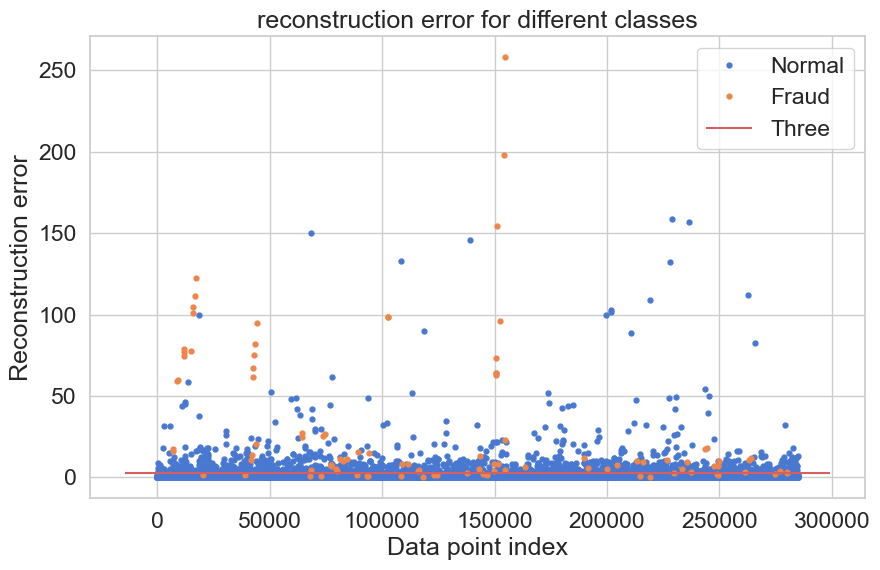

In [52]:
groups=error_df.groupby('true_class')
fig,ax=plt.subplots()
for name,group in groups:
    ax.plot(group.index,group.Reconstruction_error,marker='o',ms=3.5,linestyle='',
           label='Fraud' if name ==1 else "Normal")
ax.hlines(threshold,ax.get_xlim()[0],ax.get_xlim()[1],colors='r',zorder=100,label='Three')
ax.legend()
plt.title('reconstruction error for different classes')
plt.xlabel('Data point index')
plt.ylabel('Reconstruction error')
plt.show()


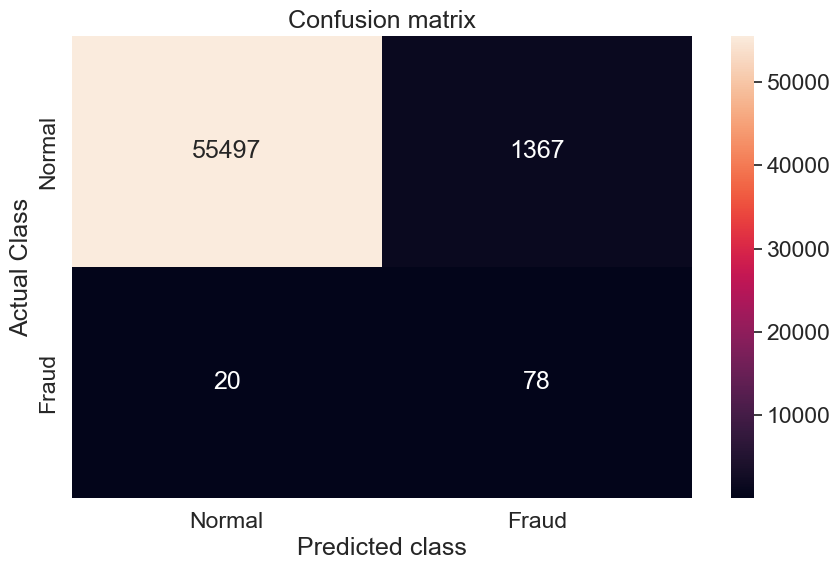

In [53]:
ypred=[1 if e>threshold else 0 for e in error_df.Reconstruction_error.values]
conf_matrix=confusion_matrix(error_df.true_class,ypred)
sns.heatmap(conf_matrix,annot=True,xticklabels=LABELS,yticklabels=LABELS,fmt='d')
plt.title('Confusion matrix')
plt.xlabel('Predicted class')
plt.ylabel('Actual Class')
plt.show()
